# missingno

missingno는 [ResidentMario](https://github.com/ResidentMario/missingno)에서 만든 결측치 시각화 툴이다.

## 1. Import and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
# 예시 데이터 - 타이타닉 데이터
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Usage

### 2.1. Matrix
`msno.matrix`는 결측치의 위치와 각 데이터의 완성도를 보여준다. 색칠되어 있지 않은 부분이 결측치의 위치이며, 그래프 옆에 스파크라인(sparkline)은 데이터의 완성도를 의미한다. 스파크라인이 오른쪽으로 치우칠수록 데이터의 완성도가 높다.

> **matrix(df, filter=None, n=0, p=0, sort=None, figsize=(25,10), width_ratios=(15, 1),      
> 　　　　color=(0.25, 0.25, 0.25), fontsize=16, labels=None, sparkline=True, inline=False,       
> 　　　　freq=None, ax=None)**     
> - `df` : 데이터프레임
> - `filter` : heatmap에 적용할 필터. 'top', 'bottom', None 중 하나.
> - `n` : 필터링된 데이터프레임의 최대 컬럼 수
> - `p` : 필터링된 데이터프레임의 컬럼들의 최대 채워짐(fill) 비율
> - `sort` : 데이터의 완성도를 기준으로 로우 정렬. 'ascending', 'descending', None 중 하나.
> - `figsize` : figure의 크기
> - `fontsize` : figure의 폰트 사이즈. 기본은 16px.
> - `labels` : 컬럼 명을 띄울 건지. 기본은 None이고 50개 이하의 피처만 보여줌. False를 하면 띄우지 않음.
> - `sparkline` : 스파크라인을 보여줄건지.
> - `width_ratios` : matrix와 스파크라인의 비율. `sparkline=False`면 아무 것도 하지 않음.
> - `color` : 컬럼들의 색깔.

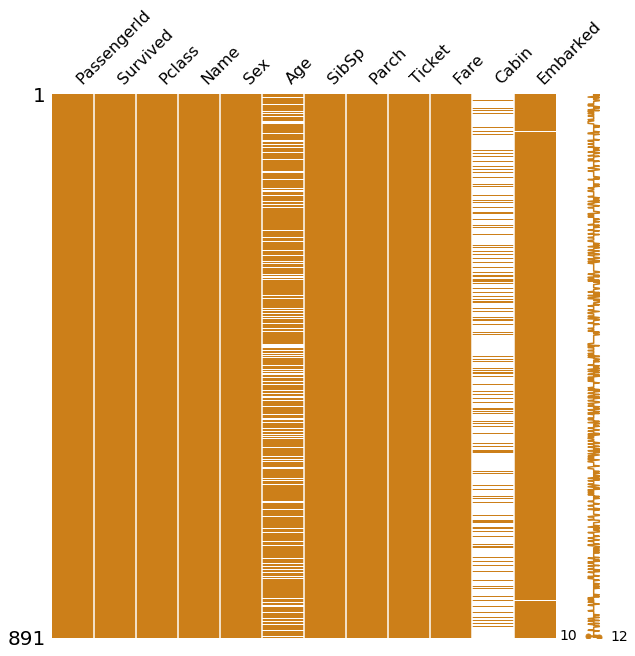

In [17]:
msno.matrix(df, figsize=(10, 10), color=(0.8, 0.5, 0.1))

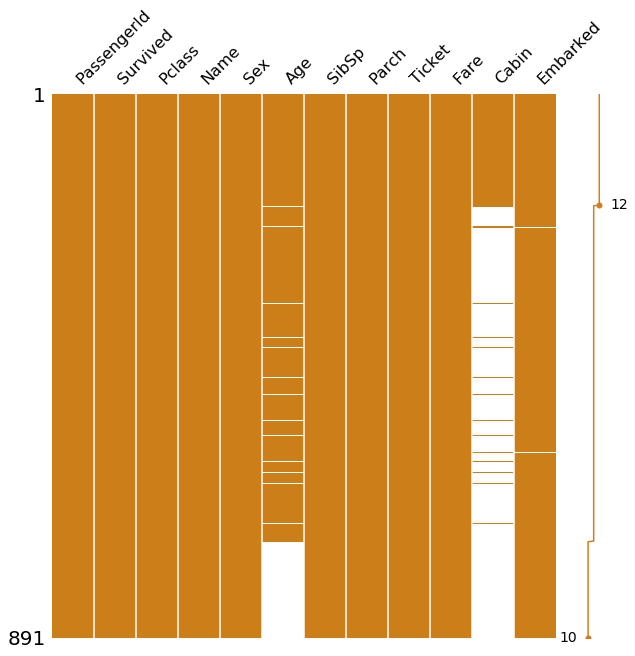

In [20]:
# 데이터 완성도(스파크라인)을 기준으로 데이터 역정렬
msno.matrix(df, sort='descending', figsize=(10, 10), color=(0.8, 0.5, 0.1))

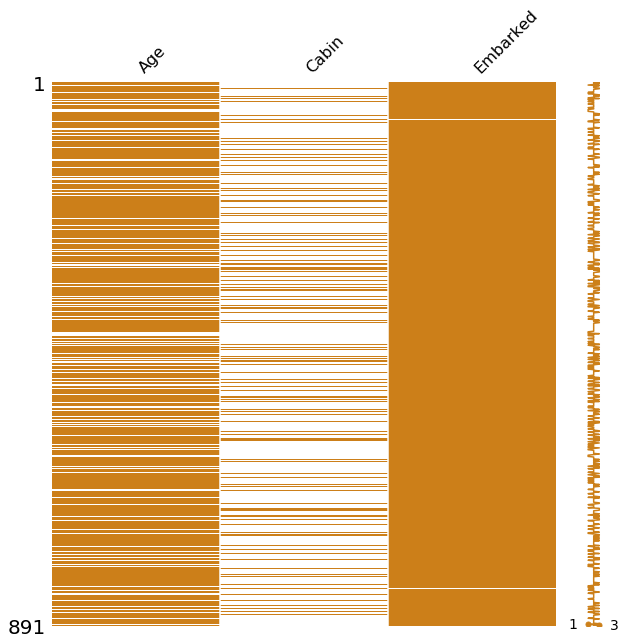

In [18]:
# 결측치가 많은 상위 3개가 출력
msno.matrix(df, filter='bottom', n=3, figsize=(10, 10), color=(0.8, 0.5, 0.1))

### 2.2. Bar
`msno.bar`는 결측치를 제외한 각 컬럼의 데이터 개수를 시각화해준다.

> **bar(df, figsize=(24,10), fontsize=16, labels=None, log=False, color='dimgray',      
> 　　　inline=False, filter=None, n=0, p=0, sort=None, ax=None)**     
> - `df` : 데이터프레임
> - `log` : 수치를 10의 거듭제곱으로 나타낼건지.
> - `filter` : heatmap에 적용할 필터. 'top', 'bottom', None 중 하나.
> - `n` : 필터링된 데이터프레임의 최대 컬럼 수
> - `p` : 필터링된 데이터프레임의 컬럼들의 최대 채워짐(fill) 비율
> - `sort` : 로우 정렬. 'ascending', 'descending', None 중 하나.
> - `figsize` : figure의 크기
> - `fontsize` : figure의 폰트 사이즈. 기본은 16px.
> - `labels` : 컬럼 명을 띄울 건지. 기본은 None이고 50개 이하의 피처만 보여줌. False를 하면 띄우지 않음.
> - `color` : 컬럼들의 색깔.

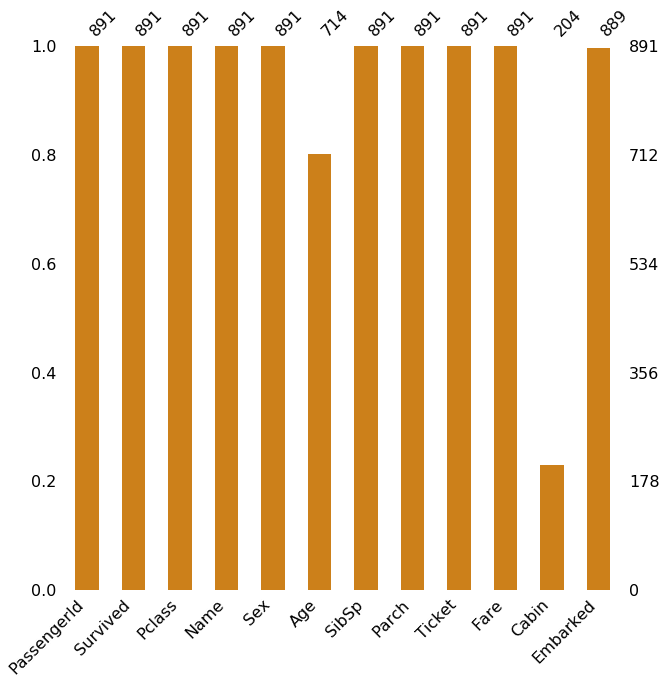

In [25]:
msno.bar(df, figsize=(10, 10), color=(0.8, 0.5, 0.1))

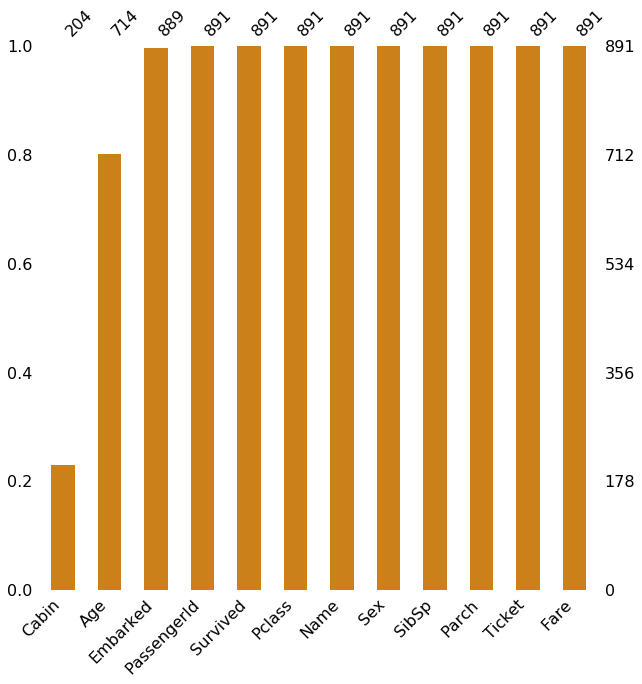

In [26]:
# 결측치의 개수를 기준으로 정렬
msno.bar(df, sort='ascending', figsize=(10, 10), color=(0.8, 0.5, 0.1))

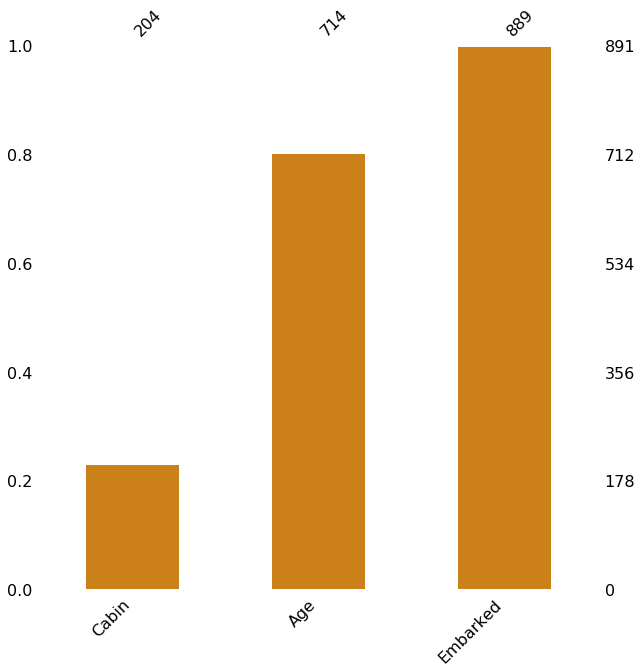

In [28]:
# 결측치가 많은 상위 3개를 출력
msno.bar(df, sort='ascending', filter='bottom', n=3, figsize=(10, 10), color=(0.8, 0.5, 0.1))

### 2.3. Heatmap
`missingo` 상관관계 히트맵은 결측치의 상관관계를 측정한다. 즉, 어떤 변수의 존재 여부가 다른 변수의 존재 여부에 얼마나 큰 영향을 끼치는지를 보여준다. 결측치가 없는 피처는 시각화에서 제외시킨다.
* -1 : 한 변수가 있다면, 다른 변수는 없음.
* 0 : 변수가 있든 없든, 다른 변수에 영향을 주지 않음.
* 1 : 한 변수가 있다면, 다른 변수는 있음.

> **heatmap(df, filter=None, n=0, p=0, sort=None, figsize=(20,12), fontsize=16, labels=True,        
> 　　　　　cmap='RdBu', vmin=-1, vmax=1, cbar=True, ax=None)**        
> - `df` : 데이터프레임
> - `filter` : heatmap에 적용할 필터. 'top', 'bottom', None 중 하나.
> - `n` : 필터링된 데이터프레임의 최대 컬럼 수
> - `p` : 필터링된 데이터프레임의 컬럼들의 최대 채워짐(fill) 비율
> - `sort` : 로우 정렬. 'ascending', 'descending', None 중 하나.
> - `figsize` : figure의 크기
> - `fontsize` : figure의 폰트 사이즈. 기본은 16px.
> - `labels` : 컬럼 명을 띄울 건지. 기본은 None이고 50개 이하의 피처만 보여줌. False를 하면 띄우지 않음.
> - `cmap` : matplotlib의 컬러맵.
> - `vmin` : 컬러맵의 최소 수치.
> - `vmax` : 컬러맵의 최대 수치.

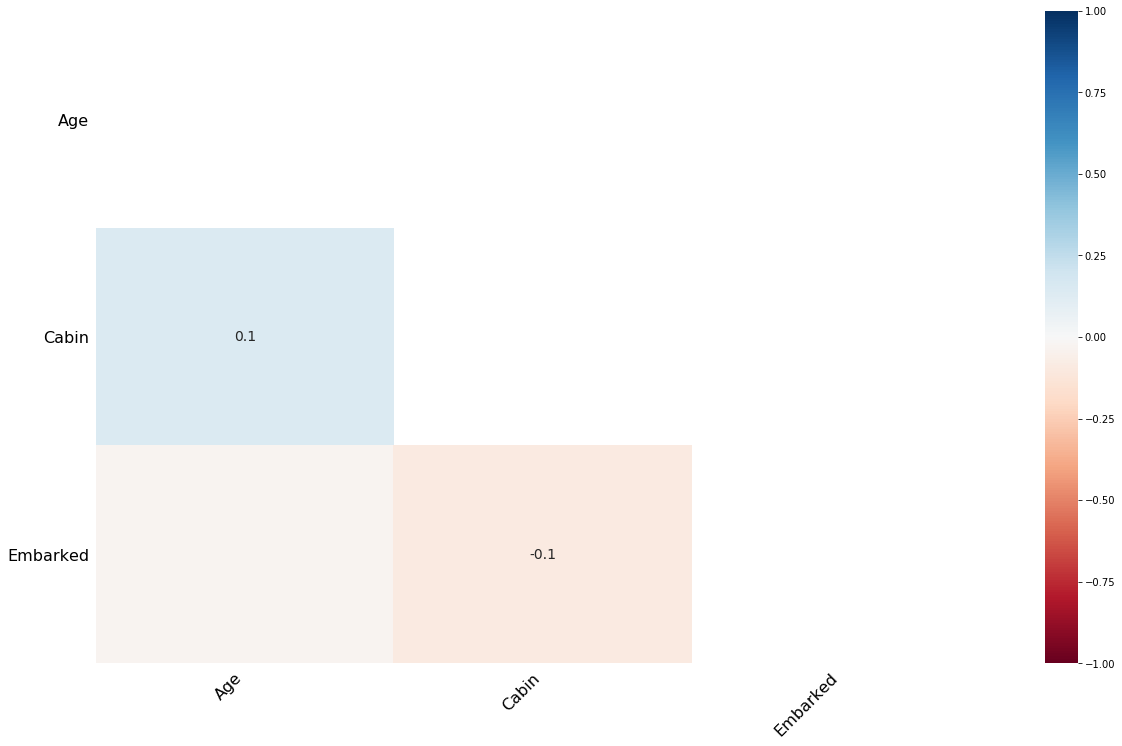

In [31]:
msno.heatmap(df)

### 2.4. Dendrogram
heatmap에서 보다 결측치의 상관관계를 더 자세히 보여준다.

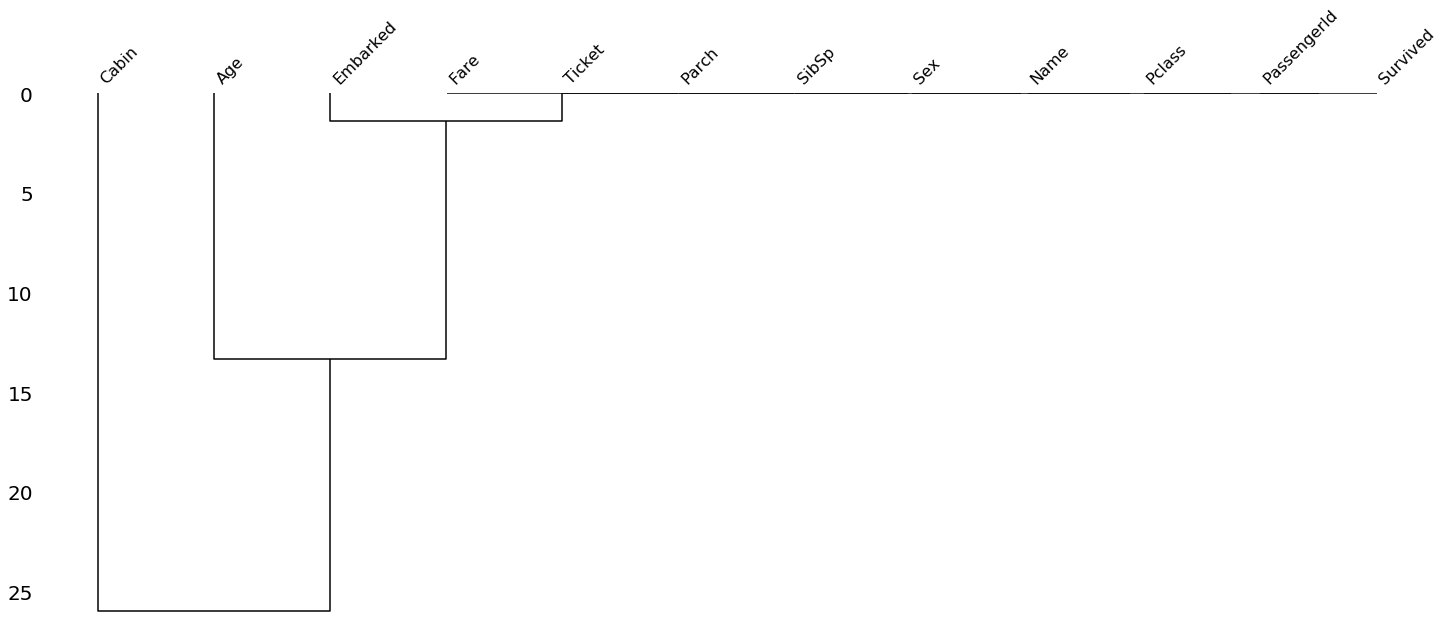

In [32]:
msno.dendrogram(df)

## References
- [데이터사이언스스쿨 - 3.1 누락 데이터 처리](https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/)
- [ResidentMario's Repository - Missingno](https://github.com/ResidentMario/missingno)